<h1>System de recommandation basé sur les livres</h1>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
books = pd.read_csv('./Books.csv')
users = pd.read_csv('./Users.csv')
ratings = pd.read_csv('./Ratings.csv')

C:\Users\Anasa\AppData\Local\Temp\ipykernel_19736\2085918429.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('./Books.csv')


In [29]:
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

In [30]:
print('Books shape:', books.shape)
print('Users shape:', users.shape)
print('Ratings shape:', ratings.shape)

Books shape: (271360, 8)
Users shape: (278858, 3)
Ratings shape: (1149780, 3)


In [31]:
books.info()
print("+++++++++++++++books++++++++++++")
users.info()
print("+++++++++++++++users++++++++++++")
ratings.info()
print("+++++++++++++++ratings++++++++++")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
+++++++++++++++books++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes

In [32]:
# i check for missing values in "books" dataframe
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [33]:
# i check for missing values in "users" dataframe
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [34]:
# i check for missing values in "ratings" dataframe
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

<Axes: xlabel='Book-Rating', ylabel='count'>

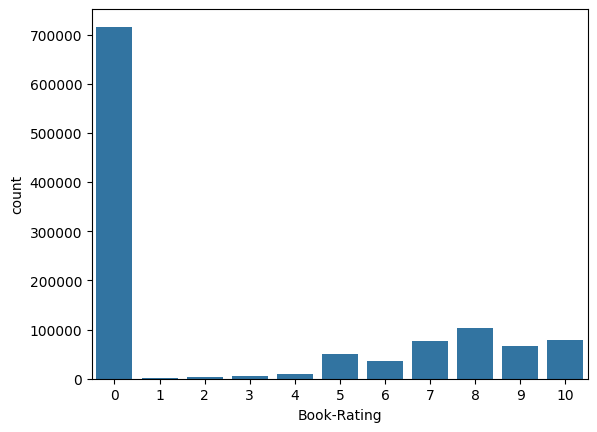

In [35]:
sns.countplot(x=ratings['Book-Rating'])

In [36]:
books['Year-Of-Publication'].value_counts()

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: count, Length: 202, dtype: int64

In [37]:
books['Year-Of-Publication'].describe()

count     271360
unique       202
top         2002
freq       13903
Name: Year-Of-Publication, dtype: int64

In [38]:
print(books['Year-Of-Publication'].unique())

[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1962' '2006' '1952' '1940' '1951' '1931' '1954

In [39]:
# we have a small exchange in data in columns
books[books['Year-Of-Publication']=='DK Publishing Inc']

ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       Book-Author Year-Of-Publication  \
209538        2000   DK Publishing Inc   
221678        2000   DK Publishing Inc   

                                                Publisher  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-S  \
209538  http://images.amazon.com/images/P/078946697X.0...   
221678  http://images.amazon.com/images/P/0789466953.0...   

                                              Image-URL-M Image-URL-L  
209538  http://images.amazon.com/images/P/078946697X.0...         NaN  
221678  http://images.amazon.com/images/P/0789466953.0...         NaN

In [40]:
# we have a small exchange in data in columns
books[books['Year-Of-Publication']=='Gallimard']

ISBN                                         Book-Title  \
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   

       Book-Author Year-Of-Publication  \
220731        2003           Gallimard   

                                                Publisher  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-S  \
220731  http://images.amazon.com/images/P/2070426769.0...   

                                              Image-URL-M Image-URL-L  
220731  http://images.amazon.com/images/P/2070426769.0...         NaN

In [41]:
# Extracting specific rows from the 'books' DataFrame and rearranging columns

# List of indices to extract
indices = [209538, 221678, 220731]
x = []
y = []

# Loop to extract specific columns and values
for i in range(len(indices)):
    x.append(books.iloc[indices[i]][2])
    y.append(books.iloc[indices[i]][7])

# Reordering columns using a while loop
i, j = 7, 1
while i > 3:
    index = indices[j]
    books.iloc[index][i] = books.iloc[index][i-1]
    i -= 1
    index += 1

# Updating the 'Book-Title' column with values from 'y'
for i in range(len(indices)):
    books.iloc[indices[i]][2] = y[i]

# Updating the 'Book-Author' column with values from 'x'
for i in range(len(indices)):
    books.iloc[indices[i]][3] = x[i]

C:\Users\Anasa\AppData\Local\Temp\ipykernel_19736\1226453963.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x.append(books.iloc[indices[i]][2])
C:\Users\Anasa\AppData\Local\Temp\ipykernel_19736\1226453963.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(books.iloc[indices[i]][7])
C:\Users\Anasa\AppData\Local\Temp\ipykernel_19736\1226453963.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  books.iloc[index][i] =

In [42]:
# check if we've fixed the problem
books[books['Year-Of-Publication']=='DK Publishing Inc']

Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []

In [43]:
books[books['Year-Of-Publication']=='Gallimard']

Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []

In [44]:
# convertir les string vers des int
books.iloc[:, 3] = books.iloc[:, 3].apply(int)

In [45]:
books = books[ books['Year-Of-Publication'] <= 2023 ]
books

ISBN                                         Book-Title  \
0       0195153448                                Classical Mythology   
1       0002005018                                       Clara Callan   
2       0060973129                               Decision in Normandy   
3       0374157065  Flu: The Story of the Great Influenza Pandemic...   
4       0393045218                             The Mummies of Urumchi   
...            ...                                                ...   
271355  0440400988                         There's a Bat in Bunk Five   
271356  0525447644                            From One to One Hundred   
271357  006008667X  Lily Dale : The True Story of the Town that Ta...   
271358  0192126040                        Republic (World's Classics)   
271359  0767409752  A Guided Tour of Rene Descartes' Meditations o...   

                 Book-Author Year-Of-Publication  \
0         Mark P. O. Morford                2002   
1       Richard Bruce Wright                2001   
2               Carlo D'Este                1991   
3           Gina Bari Kolata                1999   
4            E. J. W. Barber                1999   
...                      ...                 ...   
271355        Paula Danziger                1988   
271356            Teri Sloat                1991   
271357      Christine Wicker                2004   
271358                 Plato                1996   
271359   Christopher  Biffle                2000   

                                               Publisher  \
0                                Oxford University Press   
1                                  HarperFlamingo Canada   
2                                        HarperPerennial   
3                                   Farrar Straus Giroux   
4                             W. W. Norton &amp; Company   
...                                                  ...   
271355                   Random House Childrens Pub (Mm)   
271356                                      Dutton Books   
271357                                HarperSanFrancisco   
271358                           Oxford University Press   
271359  McGraw-Hill Humanities/Social Sciences/Languages   

                                              Image-URL-S  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-M  \
0       http://images.amazon.com/images/P/0195153448.0...   
1       http://images.amazon.com/images/P/0002005018.0...   
2       http://images.amazon.com/images/P/0060973129.0...   
3       http://images.amazon.com/images/P/0374157065.0...   
4       http://images.amazon.com/images/P/0393045218.0...   
...                                                   ...   
271355  http://images.amazon.com/images/P/0440400988.0...   
271356  http://images.amazon.com/images/P/0525447644.0...   
271357  http://images.amazon.com/images/P/006008667X.0...   
271358  http://images.amazon.com/images/P/0192126040.0...   
271359  http://images.amazon.com/images/P/0767409752.0...   

                                              Image-URL-L  
0       http://images.amazon.com/images/P/0195153448.0...  
1       http://images.amazon.com/images/P/0002005018.0...  
2       http://images.amazon.com/images/P/0060973129.0...  
3       http://images.amazon.com/images/P/0374157065.0...  
4       http://images.ama

In [49]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            5
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            2
dtype: int64

In [50]:
books['Publisher'].value_counts()

Publisher
Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Polaris Books                 1
Hannover House                1
Amber Quill Press, LLC.       1
Lunchbox Press                1
Connaught                     1
Name: count, Length: 16806, dtype: int64

In [51]:
ratings_and_books = ratings.merge(books, on="ISBN")

In [52]:
ratings_and_books.shape

(1031082, 10)

In [53]:
ratings_and_books.head(5)

User-ID        ISBN  Book-Rating            Book-Title Book-Author  \
0   276725  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
1     2313  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
2     6543  034545104X            0  Flesh Tones: A Novel  M. J. Rose   
3     8680  034545104X            5  Flesh Tones: A Novel  M. J. Rose   
4    10314  034545104X            9  Flesh Tones: A Novel  M. J. Rose   

  Year-Of-Publication         Publisher  \
0                2002  Ballantine Books   
1                2002  Ballantine Books   
2                2002  Ballantine Books   
3                2002  Ballantine Books   
4                2002  Ballantine Books   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   
3  http://images.amazon.com/images/P/034545104X.0...   
4  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/034545104X.0...   
1  http://images.amazon.com/images/P/034545104X.0...   
2  http://images.amazon.com/images/P/034545104X.0...   
3  http://images.amazon.com/images/P/034545104X.0...   
4  http://images.amazon.com/images/P/034545104X.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/034545104X.0...  
1  http://images.amazon.com/images/P/034545104X.0...  
2  http://images.amazon.com/images/P/034545104X.0...  
3  http://images.amazon.com/images/P/034545104X.0...  
4  http://images.amazon.com/images/P/034545104X.0...

## On va prendre en consideration les personnes qui ont fait plus de 200 ratings et les livres qui on eu plus de 50 ratings

In [54]:
x = ratings_and_books.groupby('User-ID').count()['Book-Rating'] > 200
reading_users = x[x].index

In [55]:
filtered_rating = ratings_and_books[ratings_and_books['User-ID'].isin(reading_users)]

In [56]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] > 50
nice_books = y[y].index

In [57]:
final_books = ratings_and_books[ratings_and_books['Book-Title'].isin(nice_books)]

In [58]:
final_books

User-ID        ISBN  Book-Rating              Book-Title  \
62        276727  0446520802            0            The Notebook   
63        278418  0446520802            0            The Notebook   
64           638  0446520802            0            The Notebook   
65          3363  0446520802            0            The Notebook   
66          7158  0446520802           10            The Notebook   
...          ...         ...          ...                     ...   
1027869   269566  0670809381            0                  Echoes   
1028723   271284  0440910927            0           The Rainmaker   
1029016   271705  B0001PIOX4            0          Fahrenheit 451   
1030309   274808  0449701913            0              Homecoming   
1030814   275970  1586210661            9  Me Talk Pretty One Day   

             Book-Author Year-Of-Publication                Publisher  \
62       Nicholas Sparks                1996             Warner Books   
63       Nicholas Sparks                1996             Warner Books   
64       Nicholas Sparks                1996             Warner Books   
65       Nicholas Sparks                1996             Warner Books   
66       Nicholas Sparks                1996             Warner Books   
...                  ...                 ...                      ...   
1027869     Maeve Binchy                1986              Penguin USA   
1028723     John Grisham                1995                   Island   
1029016     Ray Bradbury                1993     Simon &amp; Schuster   
1030309    Cynthia Voigt                1983            Fawcett Books   
1030814    David Sedaris                2001  Time Warner Audio Major   

                                               Image-URL-S  \
62       http://images.amazon.com/images/P/0446520802.0...   
63       http://images.amazon.com/images/P/0446520802.0...   
64       http://images.amazon.com/images/P/0446520802.0...   
65       http://images.amazon.com/images/P/0446520802.0...   
66       http://images.amazon.com/images/P/0446520802.0...   
...                                                    ...   
1027869  http://images.amazon.com/images/P/0670809381.0...   
1028723  http://images.amazon.com/images/P/0440910927.0...   
1029016  http://images.amazon.com/images/P/B0001PIOX4.0...   
1030309  http://images.amazon.com/images/P/0449701913.0...   
1030814  http://images.amazon.com/images/P/1586210661.0...   

                                               Image-URL-M  \
62       http://images.amazon.com/images/P/0446520802.0...   
63       http://images.amazon.com/images/P/0446520802.0...   
64       http://images.amazon.com/images/P/0446520802.0...   
65       http://images.amazon.com/images/P/0446520802.0...   
66       http://images.amazon.com/images/P/0446520802.0...   
...                                                    ...   
1027869  http://images.amazon.com/images/P/0670809381.0...   
1028723  http://images.amazon.com/images/P/0440910927.0...   
1029016  http://images.amazon.com/images/P/B0001PIOX4.0...   
1030309  http://images.amazon.com/images/P/0449701913.0...   
1030814  http://images.amazon.com/images/P/1586210661.0...   

                                               Image-URL-L  
62       http://images.amazon.com/images/P/0446520802.0...  
63       http://images.amazon.com/images/P/0446520802.0...  
64       http://images.amazon.com/images/P/0446520802.0...  
65       http://images.amazon.com/images/P/0446520802.0...  
66       http://images.amazon.com/images/P/0446520802.0...  
...                                                    ...  
1027869  http://images.amazon.com/images/P/0670809381.0...  
1028723  http://images.amazon.com/images/P/0440910927.0...  
1029016  http://images.amazon.com/images/P/B0001PIOX4.0...  
1030309  http://images.amazon.com/images/P/0449701913.0...  
1030814  http://images.amazon.com/images/P/1586210661.0...  

[154153 rows x 10 columns]

In [59]:
final_books.shape

(154153, 10)

In [60]:
# Create a Pivot Table
pt = final_books.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [61]:
# fill the NaN values with 0 
pt.fillna(0,inplace=True)
pt

User-ID                                             8       9       14      \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             16      17      26      \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             32      39      42      \
Book-Title                                                                   
1984                                                   0.0     0.0     0.0   
1st to Die: A Novel                                    0.0     0.0     0.0   
2nd Chance                                             0.0     0.0     0.0   
4 Blondes                                              0.0     0.0     0.0   
A Bend in the Road                                     0.0     0.0     0.0   
...                                                    ...     ...     ...   
Year of Wonders                                        0.0     0.0     0.0   
You Belong To Me                                       0.0     0.0     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0     0.0     0.0   
Zoya                                                   0.0     0.0     0.0   
\O\" Is for Outlaw"                                    0.0     0.0     0.0   

User-ID                                             44      ...  278807  \
Book-Title                                                  ...           
1984                                                   0.0  ...     0.0   
1st to Die: A Novel                                    0.0  ...     0.0   
2nd Chance                                             0.0  ...     0.0   
4 Blondes                                              0.0  ...     0.0   
A Bend in the Road                                     0.0  ...     0.0   
...                                                    ...  ...     ...   
Year of Wonders                                        0.0  ...     0.0   
You Belong To Me                                       0.0  ...     0.0   
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0   
Zoya                                                   0.0  ...     0.0   
\O\" Is for Outlaw"                                    

In [63]:
from sklearn.metrics.pairwise import cosine_similarity #to find similarity in n dimensions

similarity_scores = cosine_similarity(pt)

In [64]:
def recommend(book_name):
    # Find the index of the book in the pivot table
    index = np.where(pt.index == book_name)[0][0]
    
    # Retrieve similarity scores for the selected book
    distance = similarity_scores[index]
    
    # Find the indices and similarity scores of the most similar books
    similar_list = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    # Print the recommended books
    for i in similar_list:
        print(pt.index[i[0]])  

In [65]:
recommend('Zoya')

Fine Things
Message from Nam
No Greater Love
Kaleidoscope
Heartbeat
